In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('preprocessed data.xlsx')

In [3]:
df.head()

,target,tumor size,node status of the tumor,Age of the patient,tumor grade
0,0,2,1,60,3
1,0,1,1,55,2
2,0,1,1,33,3
3,0,1,1,67,2
4,0,1,1,47,2


In [4]:
df.describe()

,target,tumor size,node status of the tumor,Age of the patient,tumor grade
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.183761,1.944444,0.705128,48.974359,2.598291
std,0.388119,0.525234,0.670193,10.551294,0.533188
min,0.000000,1.000000,0.000000,25.000000,1.000000
25%,0.000000,2.000000,0.000000,41.000000,2.000000
50%,0.000000,2.000000,1.000000,49.000000,3.000000
75%,0.000000,2.000000,1.000000,56.750000,3.000000
max,1.000000,3.000000,3.000000,75.000000,3.000000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

In [7]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [8]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [9]:
X_res.shape

(382, 4)

In [10]:
y_res.shape

(382,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import Normalizer

In [13]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8181818181818182
[[33 14]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        47
           1       0.68      1.00      0.81        30

    accuracy                           0.82        77
   macro avg       0.84      0.85      0.82        77
weighted avg       0.88      0.82      0.82        77



In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
model = GaussianNB()

In [19]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5454545454545454
[[15 32]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.83      0.32      0.46        47
           1       0.46      0.90      0.61        30

    accuracy                           0.55        77
   macro avg       0.65      0.61      0.53        77
weighted avg       0.69      0.55      0.52        77



In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
model = SVC()

In [22]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.38961038961038963
[[ 0 47]
 [ 0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.39      1.00      0.56        30

    accuracy                           0.39        77
   macro avg       0.19      0.50      0.28        77
weighted avg       0.15      0.39      0.22        77



/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
model = neighbors.KNeighborsClassifier(3)

In [25]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7012987012987013
[[26 21]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.93      0.55      0.69        47
           1       0.57      0.93      0.71        30

    accuracy                           0.70        77
   macro avg       0.75      0.74      0.70        77
weighted avg       0.79      0.70      0.70        77



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.38961038961038963
[[ 0 47]
 [ 0 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.39      1.00      0.56        30

    accuracy                           0.39        77
   macro avg       0.19      0.50      0.28        77
weighted avg       0.15      0.39      0.22        77



/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(standarized_x,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [30]:
y_pred = xgb_model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8311688311688312
[[34 13]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        47
           1       0.70      1.00      0.82        30

    accuracy                           0.83        77
   macro avg       0.85      0.86      0.83        77
weighted avg       0.88      0.83      0.83        77



In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
rfc=RandomForestClassifier(random_state=42)

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [34]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(standarized_x,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [35]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [36]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [37]:
rfc1.fit(standarized_x,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
pred=rfc1.predict(standarized_x_test)

In [58]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.8311688311688312


In [65]:
xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 1,
                            objective = "binary:logistic")

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

# Fit the model
model_xgboost = xgb_rscv.fit(standarized_x,y_train)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.742, total=   0.0s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.742, total=   0.0s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, co

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.774, total=   0.0s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.806, total=   0.0s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.806, total=   0.0s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, co

[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.742, total=   0.0s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.774, total=   0.0s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.774, total=   0.0s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytr

[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.867, total=   0.1s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.733, total=   0.1s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.867, total=   0.1s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytr

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


In [66]:
model_xgboost.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0.3,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 1000,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1.5,
 'scale_pos_weight': 1,
 'subsample': 0.4,
 'tree_method': 'exact',
 'validate_parameters': False,
 'verbosity': 1,
 'predictor': 'cpu_predictor'}

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [71]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [72]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [73]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [74]:
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [80]:
random_state = 42

In [81]:
log_clf = LogisticRegression(random_state = random_state )
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.1s finished


NameError: name 'itertools' is not defined

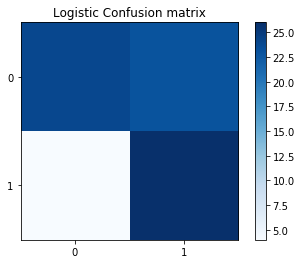

In [82]:
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(standarized_x,y_train)
y_pred = CV_log_clf.predict(standarized_x_test)
y_score = CV_log_clf.decision_function(standarized_x_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()